In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [182]:
df = pd.read_csv("HomeC_Device.csv")
df.head()

,time,Barn_r,Barn_p,Dishwasher_r,Dishwasher_p,Fridge_r,Fridge_p,Furnace_r,Furnace_p,Garage door_r,...,Well_r,Well_p,Wine cellar_r,Wine cellar_p,month,day,weekday,hour,minute,fare
0,2016-11-01 00:01:00,0.029750,0.025337,0.000000,-0.006463,0.005400,0.008750,0.088783,0.087916,0.039867,...,0.001000,0.013481,0.007933,0.006773,11,1,Tuesday,0,1,153.0
1,2016-11-01 00:02:00,0.029733,0.025807,0.000000,-0.006290,0.005033,0.008470,0.141400,0.156919,0.033667,...,0.001000,0.013835,0.007917,0.006821,11,1,Tuesday,0,2,153.0
2,2016-11-01 00:03:00,0.029533,0.025576,0.000017,-0.006267,0.005067,0.008500,0.201750,0.235353,0.013200,...,0.001000,0.013835,0.007933,0.006838,11,1,Tuesday,0,3,153.0
3,2016-11-01 00:04:00,0.029333,0.025345,0.000100,-0.006155,0.005333,0.008742,0.691767,0.648559,0.013483,...,0.000967,0.013528,0.008367,0.007273,11,1,Tuesday,0,4,153.0
4,2016-11-01 00:05:00,0.029400,0.025422,0.000100,-0.006155,0.005300,0.008711,0.662050,0.620258,0.013450,...,0.001000,0.013835,0.008317,0.007223,11,1,Tuesday,0,5,153.0


In [183]:
high = [7,8,9,10,11,12]
df_h = df[df['hour'].isin(high)]
df_h.tail()

,time,Barn_r,Barn_p,Dishwasher_r,Dishwasher_p,Fridge_r,Fridge_p,Furnace_r,Furnace_p,Garage door_r,...,Well_r,Well_p,Wine cellar_r,Wine cellar_p,month,day,weekday,hour,minute,fare
42534,2016-11-30 12:55:00,0.032433,0.036593,0.000017,-0.007223,0.004850,0.008464,0.085733,0.087321,0.013283,...,0.000933,0.009317,0.007817,0.006610,11,30,Wednesday,12,55,188.8
42535,2016-11-30 12:56:00,0.032083,0.036174,0.000017,-0.007223,0.004883,0.008494,0.085167,0.086532,0.013283,...,0.000850,0.008553,0.007817,0.006610,11,30,Wednesday,12,56,188.8
42536,2016-11-30 12:57:00,0.032033,0.036115,0.000000,-0.007246,0.104867,0.104577,0.083917,0.084791,0.013250,...,0.000817,0.008248,0.007867,0.006660,11,30,Wednesday,12,57,188.8
42537,2016-11-30 12:58:00,0.031833,0.035875,0.000000,-0.007246,0.141617,0.142808,0.084733,0.085929,0.013250,...,0.000750,0.007637,0.007817,0.006610,11,30,Wednesday,12,58,188.8
42538,2016-11-30 12:59:00,0.031800,0.035836,0.000017,-0.007223,0.138183,0.139170,0.084083,0.085023,0.013267,...,0.000683,0.007026,0.007800,0.006593,11,30,Wednesday,12,59,188.8


In [184]:
df_h.columns

Index(['time', 'Barn_r', 'Barn_p', 'Dishwasher_r', 'Dishwasher_p', 'Fridge_r',
       'Fridge_p', 'Furnace_r', 'Furnace_p', 'Garage door_r', 'Garage door_p',
       'Home office_r', 'Home office_p', 'Kitchen_r', 'Kitchen_p',
       'Living room_r', 'Living room_p', 'Microwave_r', 'Microwave_p',
       'Solar_r', 'Solar_p', 'Well_r', 'Well_p', 'Wine cellar_r',
       'Wine cellar_p', 'month', 'day', 'weekday', 'hour', 'minute', 'fare'],
      dtype='object')

In [185]:
interested = ['time','Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p', 'Home office_p',
              'Kitchen_p','Living room_p', 'Microwave_p','Solar_p', 'Well_p','Wine cellar_p','day']
df_h = df_h[interested]

In [186]:
df_h = df_h.set_index('time')
df_h.head()

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p,day
time,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,-0.005638,0.008499,0.082568,0.012475,0.115175,-0.000555,0.314612,0.001210,0.004938,0.014536,0.123498,1
2016-11-01 07:01:00,0.029704,-0.005661,0.008499,0.081473,0.012475,0.113266,-0.000528,0.319414,0.001256,0.004938,0.014536,0.123334,1
2016-11-01 07:02:00,0.080999,-0.005661,0.008453,0.081648,0.012475,0.113468,-0.000633,0.318858,0.001256,0.004973,0.014842,0.123154,1
2016-11-01 07:03:00,0.145498,-0.005638,0.008484,0.082349,0.012455,0.111744,-0.000581,0.318705,0.001119,0.004938,0.015914,0.122793,1
2016-11-01 07:04:00,0.029765,-0.005661,0.008453,0.081845,0.012475,0.113451,-0.000581,0.316924,0.001302,0.004973,0.014536,0.122630,1


In [187]:
df_h.columns[:]

Index(['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p', 'day'],
      dtype='object')

In [188]:
# 음수값을 0으로
cols = df_h.columns[:]
for col in cols:
    df_h.loc[df_h[col]<0,[col]] = 0

df_h.head()

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p,day
time,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.0,0.314612,0.001210,0.004938,0.014536,0.123498,1
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.0,0.319414,0.001256,0.004938,0.014536,0.123334,1
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.0,0.318858,0.001256,0.004973,0.014842,0.123154,1
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.0,0.318705,0.001119,0.004938,0.015914,0.122793,1
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.0,0.316924,0.001302,0.004973,0.014536,0.122630,1


In [189]:
d1 = df_h.loc[df_h['day']==1]
d1

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p,day
time,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.000000,0.314612,0.001210,0.004938,0.014536,0.123498,1
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.000000,0.319414,0.001256,0.004938,0.014536,0.123334,1
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.000000,0.318858,0.001256,0.004973,0.014842,0.123154,1
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.000000,0.318705,0.001119,0.004938,0.015914,0.122793,1
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.000000,0.316924,0.001302,0.004973,0.014536,0.122630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 12:55:00,0.028617,0.0,0.007789,0.078033,0.012611,0.110022,0.000246,0.000988,0.001718,0.004542,0.011421,0.006896,1
2016-11-01 12:56:00,0.028361,0.0,0.007789,0.077553,0.012611,0.112309,0.000246,0.000905,0.001673,0.004525,0.010808,0.006645,1
2016-11-01 12:57:00,0.028755,0.0,0.007805,0.075483,0.012611,0.104520,0.000220,0.000794,0.001718,0.004542,0.011421,0.006679,1


In [190]:
d1['p_sum'] = d1.sum(axis=1)
d1

/tmp/ipykernel_61/2603312445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['p_sum'] = d1.sum(axis=1)


,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p,day,p_sum
time,,,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.000000,0.314612,0.001210,0.004938,0.014536,0.123498,1,1.707035
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.000000,0.319414,0.001256,0.004938,0.014536,0.123334,1,1.708896
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.000000,0.318858,0.001256,0.004973,0.014842,0.123154,1,1.760127
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.000000,0.318705,0.001119,0.004938,0.015914,0.122793,1,1.823999
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.000000,0.316924,0.001302,0.004973,0.014536,0.122630,1,1.706353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 12:55:00,0.028617,0.0,0.007789,0.078033,0.012611,0.110022,0.000246,0.000988,0.001718,0.004542,0.011421,0.006896,1,1.262885
2016-11-01 12:56:00,0.028361,0.0,0.007789,0.077553,0.012611,0.112309,0.000246,0.000905,0.001673,0.004525,0.010808,0.006645,1,1.263427
2016-11-01 12:57:00,0.028755,0.0,0.007805,0.075483,0.012611,0.104520,0.000220,0.000794,0.001718,0.004542,0.011421,0.006679,1,1.254548


In [191]:
d1 = d1.drop(columns=['day','p_sum'])
d1

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.000000,0.314612,0.001210,0.004938,0.014536,0.123498
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.000000,0.319414,0.001256,0.004938,0.014536,0.123334
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.000000,0.318858,0.001256,0.004973,0.014842,0.123154
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.000000,0.318705,0.001119,0.004938,0.015914,0.122793
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.000000,0.316924,0.001302,0.004973,0.014536,0.122630
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 12:55:00,0.028617,0.0,0.007789,0.078033,0.012611,0.110022,0.000246,0.000988,0.001718,0.004542,0.011421,0.006896
2016-11-01 12:56:00,0.028361,0.0,0.007789,0.077553,0.012611,0.112309,0.000246,0.000905,0.001673,0.004525,0.010808,0.006645
2016-11-01 12:57:00,0.028755,0.0,0.007805,0.075483,0.012611,0.104520,0.000220,0.000794,0.001718,0.004542,0.011421,0.006679


In [192]:
d1_h = d1
d1_h.index = pd.to_datetime(d1_h.index)

In [193]:
d1_h = d1_h.resample("1H").sum()
d1_h

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,2.722449,0.000000,4.979096,12.112751,1.260121,6.070458,0.003229,18.727235,12.195654,0.286612,0.863329,7.305345
2016-11-01 08:00:00,2.554370,0.000000,4.235932,14.238328,0.729186,5.933945,0.010312,0.315063,0.097036,0.327719,0.684673,1.377795
2016-11-01 09:00:00,2.140730,1.297435,7.249318,9.020408,0.736617,5.945526,3.539280,0.079477,0.715355,0.298581,3.171009,0.385778
2016-11-01 10:00:00,2.430854,31.230887,6.666469,7.802007,0.674905,5.928682,0.028395,17.351951,0.134694,0.275665,4.823881,0.370501
2016-11-01 11:00:00,2.086518,26.102019,13.688981,19.318665,0.676160,9.530244,0.056646,1.499783,0.126306,0.275479,3.109739,0.375282
2016-11-01 12:00:00,1.919611,0.000000,4.386165,4.590022,0.749999,6.473070,0.013654,0.071921,0.099051,0.278194,2.321881,0.397176


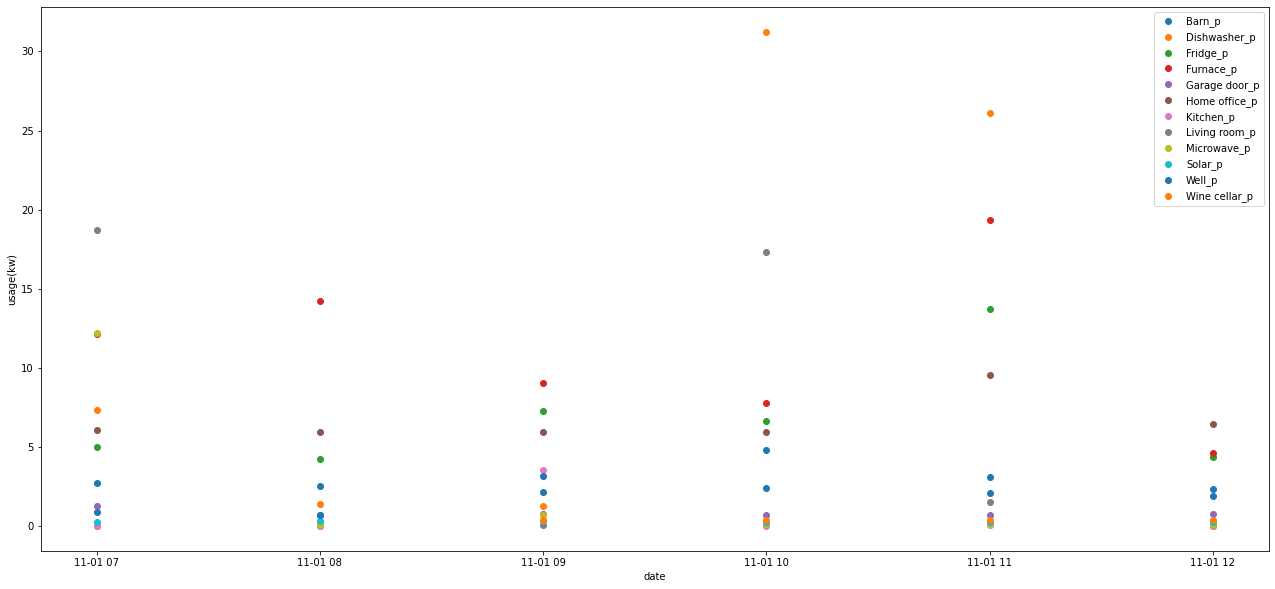

In [194]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot_date(d1_h.index, d1_h)
plt.xlabel("date")
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))

In [195]:
from matplotlib import dates

In [196]:
d1.index

DatetimeIndex(['2016-11-01 07:00:00', '2016-11-01 07:01:00',
               '2016-11-01 07:02:00', '2016-11-01 07:03:00',
               '2016-11-01 07:04:00', '2016-11-01 07:05:00',
               '2016-11-01 07:06:00', '2016-11-01 07:07:00',
               '2016-11-01 07:08:00', '2016-11-01 07:09:00',
               ...
               '2016-11-01 12:50:00', '2016-11-01 12:51:00',
               '2016-11-01 12:52:00', '2016-11-01 12:53:00',
               '2016-11-01 12:54:00', '2016-11-01 12:55:00',
               '2016-11-01 12:56:00', '2016-11-01 12:57:00',
               '2016-11-01 12:58:00', '2016-11-01 12:59:00'],
              dtype='datetime64[ns]', name='time', length=360, freq=None)

In [197]:
d1.loc['2016-11-01 07:00:00':'2016-11-01 07:06:00' ]

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.0,0.314612,0.001210,0.004938,0.014536,0.123498
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.0,0.319414,0.001256,0.004938,0.014536,0.123334
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.0,0.318858,0.001256,0.004973,0.014842,0.123154
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.0,0.318705,0.001119,0.004938,0.015914,0.122793
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.0,0.316924,0.001302,0.004973,0.014536,0.122630
2016-11-01 07:05:00,0.030005,0.0,0.008484,0.082962,0.012535,0.113553,0.0,0.317804,0.001347,0.004955,0.014536,0.122974
2016-11-01 07:06:00,0.030265,0.0,0.008514,0.082458,0.012495,0.106636,0.0,0.316541,0.001621,0.004886,0.014689,0.122941


/tmp/ipykernel_61/3958919143.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['7','8','9','10','11','12','13'])


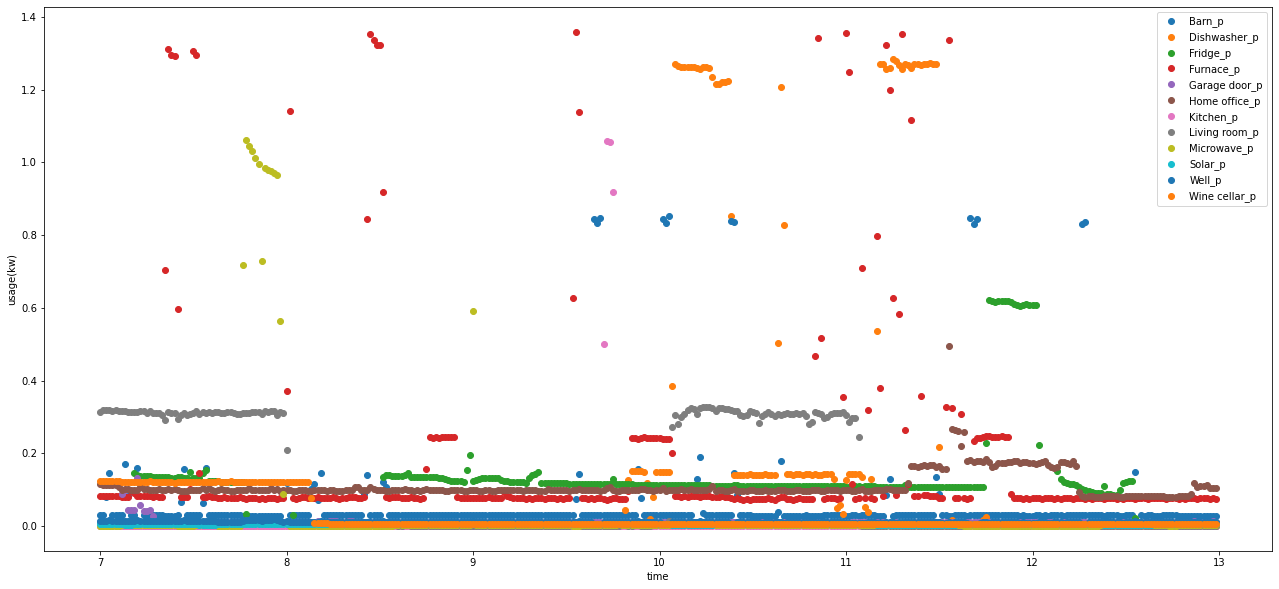

In [198]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot_date(d1.index, d1)
plt.xlabel("time")
# ax.set_xticks(d1.loc['2016-11-01 07:00:00': '2016-11-01 12:00:00'].all())
ax.set_xticklabels(['7','8','9','10','11','12','13'])
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))

In [199]:
df_h = df_h.drop(columns=['day'])
df_h.head()

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,0.029524,0.0,0.008499,0.082568,0.012475,0.115175,0.0,0.314612,0.001210,0.004938,0.014536,0.123498
2016-11-01 07:01:00,0.029704,0.0,0.008499,0.081473,0.012475,0.113266,0.0,0.319414,0.001256,0.004938,0.014536,0.123334
2016-11-01 07:02:00,0.080999,0.0,0.008453,0.081648,0.012475,0.113468,0.0,0.318858,0.001256,0.004973,0.014842,0.123154
2016-11-01 07:03:00,0.145498,0.0,0.008484,0.082349,0.012455,0.111744,0.0,0.318705,0.001119,0.004938,0.015914,0.122793
2016-11-01 07:04:00,0.029765,0.0,0.008453,0.081845,0.012475,0.113451,0.0,0.316924,0.001302,0.004973,0.014536,0.122630


In [200]:
df_h.index = pd.to_datetime(df_h.index)
df_hh = df_h.resample("1H").sum()
df_hh

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 07:00:00,2.722449,0.000000,4.979096,12.112751,1.260121,6.070458,0.003229,18.727235,12.195654,0.286612,0.863329,7.305345
2016-11-01 08:00:00,2.554370,0.000000,4.235932,14.238328,0.729186,5.933945,0.010312,0.315063,0.097036,0.327719,0.684673,1.377795
2016-11-01 09:00:00,2.140730,1.297435,7.249318,9.020408,0.736617,5.945526,3.539280,0.079477,0.715355,0.298581,3.171009,0.385778
2016-11-01 10:00:00,2.430854,31.230887,6.666469,7.802007,0.674905,5.928682,0.028395,17.351951,0.134694,0.275665,4.823881,0.370501
2016-11-01 11:00:00,2.086518,26.102019,13.688981,19.318665,0.676160,9.530244,0.056646,1.499783,0.126306,0.275479,3.109739,0.375282
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 08:00:00,2.343355,0.000000,1.606996,10.777505,0.764397,3.015507,0.000000,18.658128,0.245905,0.260659,3.166603,0.416567
2016-11-30 09:00:00,2.238325,0.000000,3.132783,15.207513,1.038945,7.447628,0.000000,0.123902,0.113082,0.308110,3.046637,0.405215
2016-11-30 10:00:00,1.439943,0.000000,3.666075,8.106107,0.769162,30.243919,0.000000,0.132429,0.083666,0.392460,0.226887,0.355726


In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot_date(df_hh.index, df_hh)
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))

NameError: name 'plt' is not defined

In [202]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

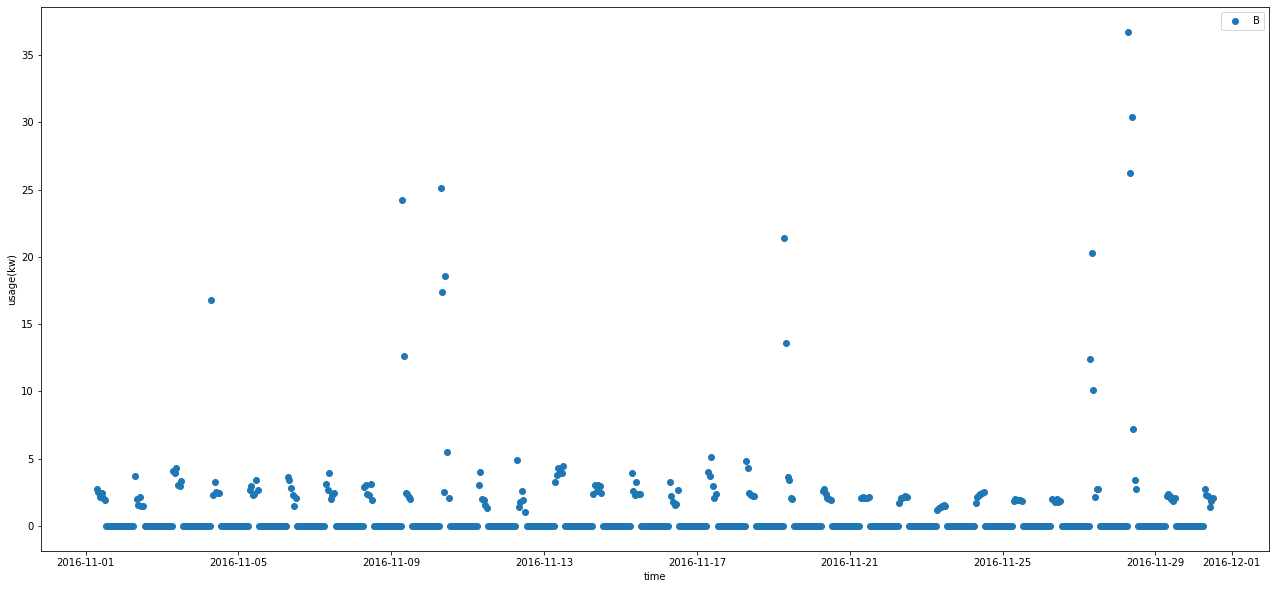

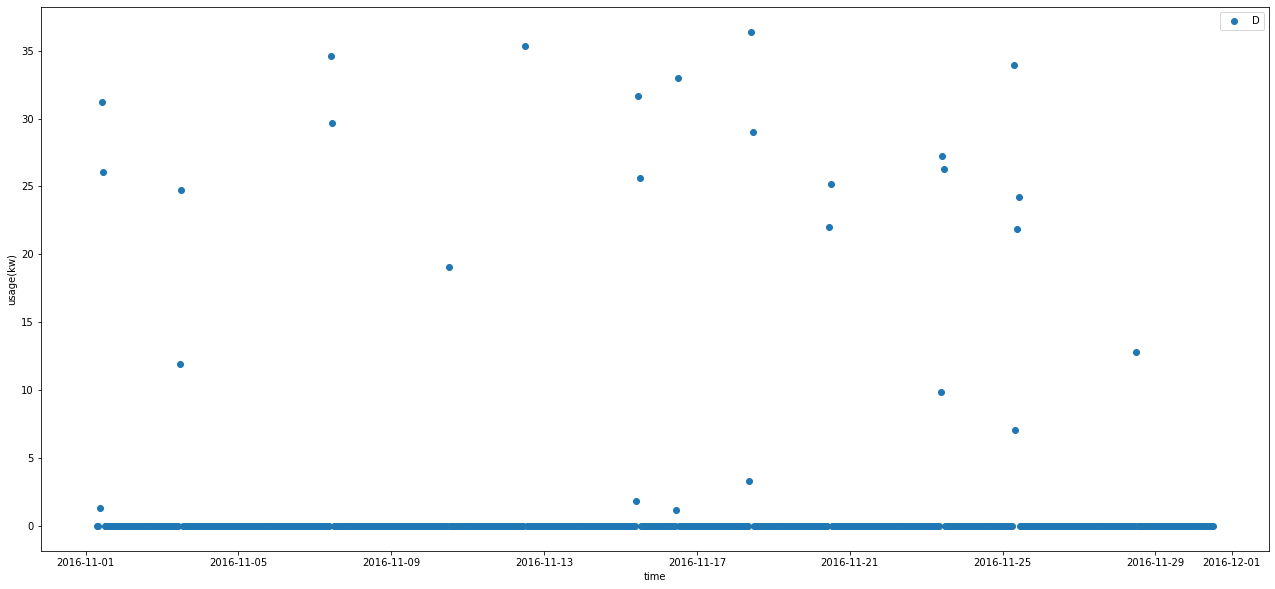

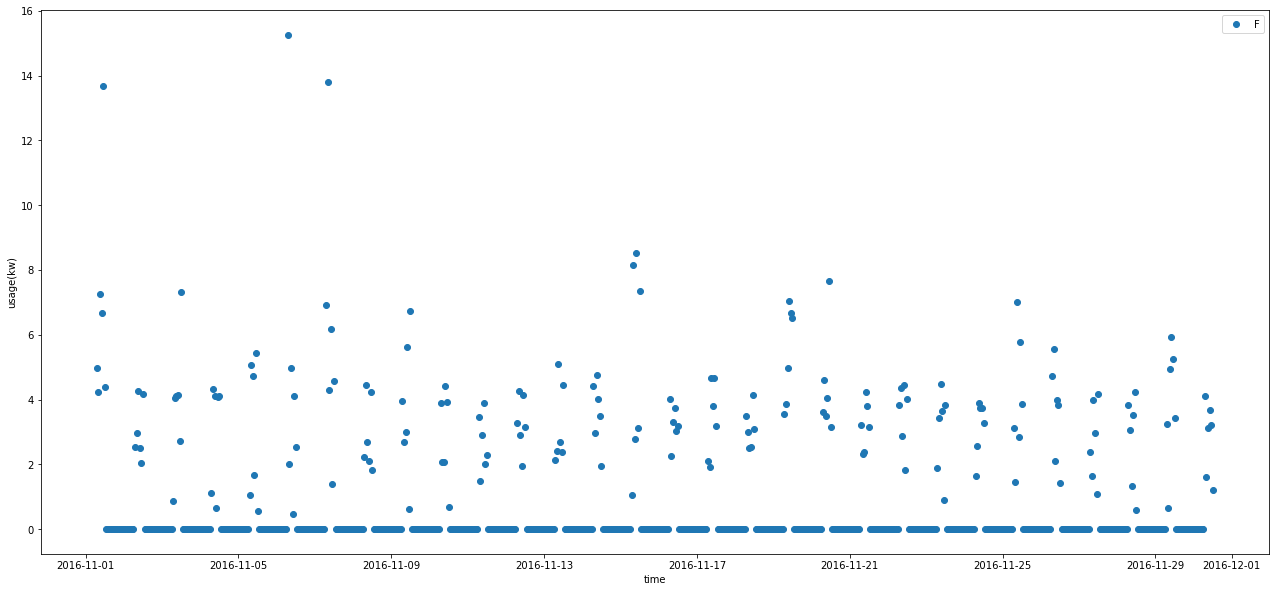

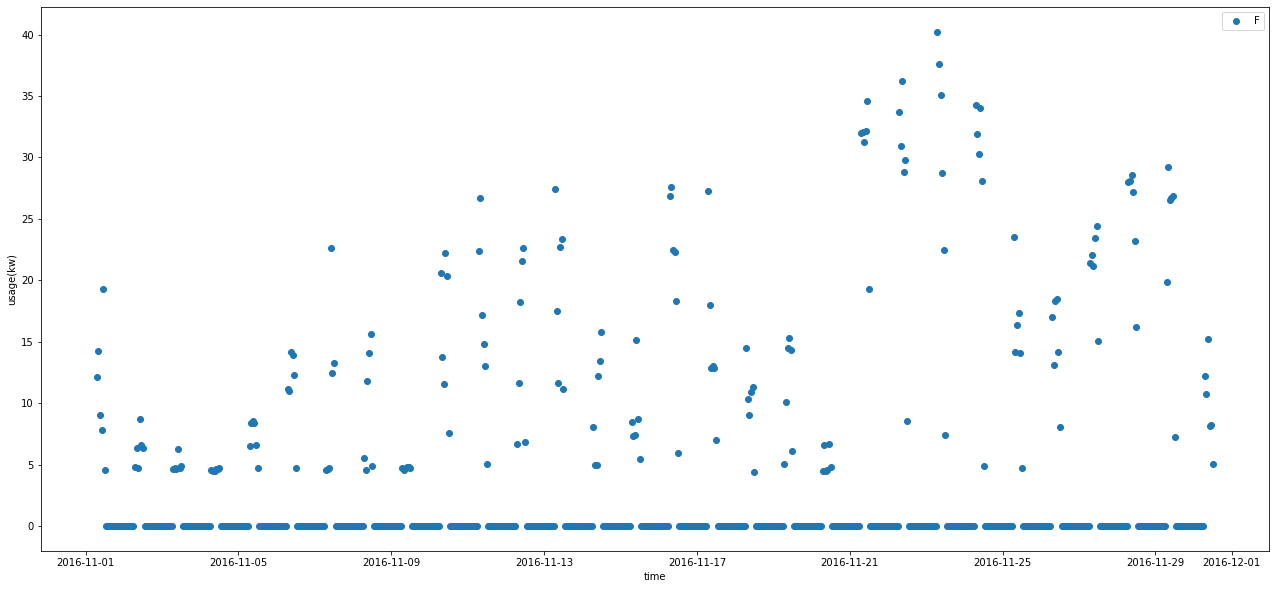

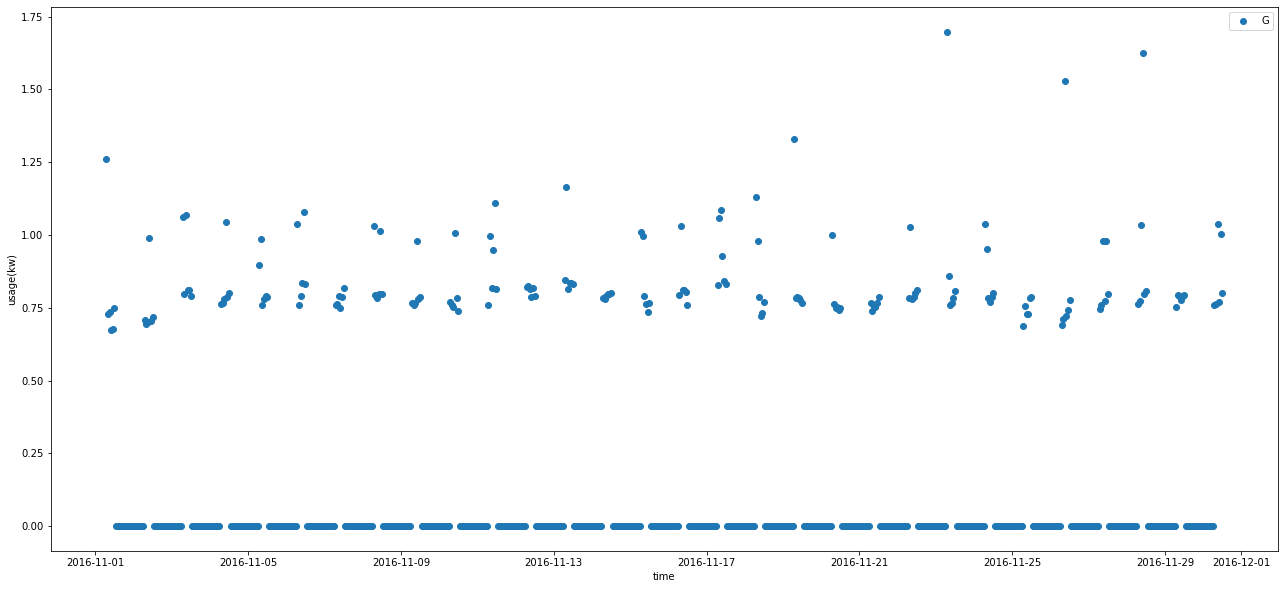

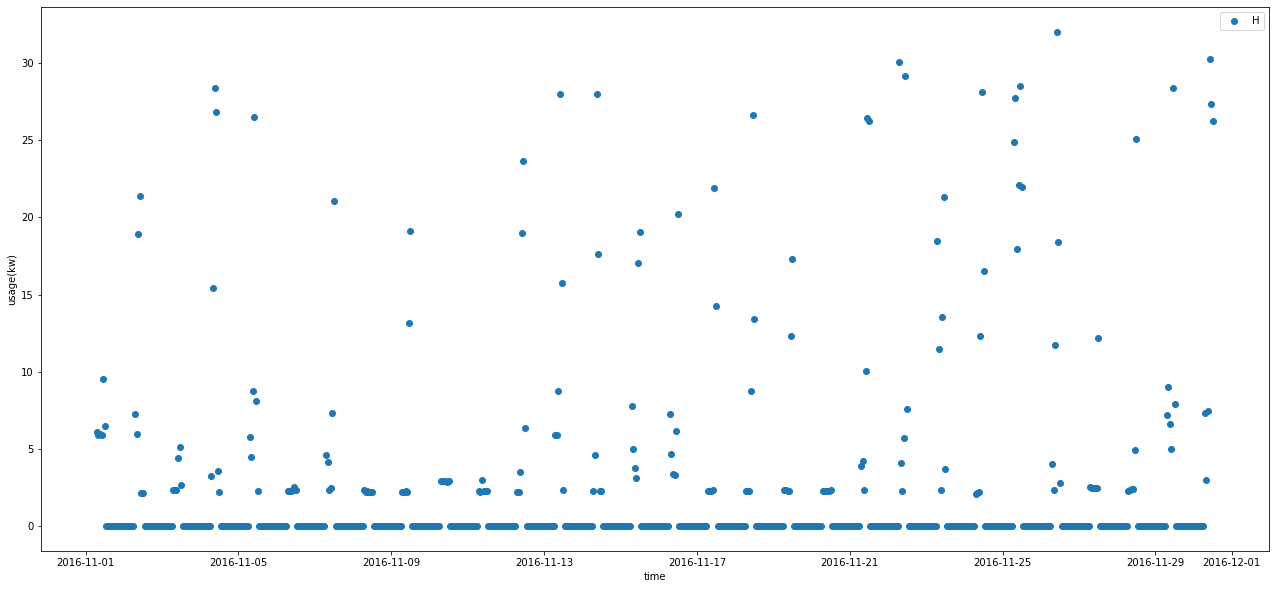

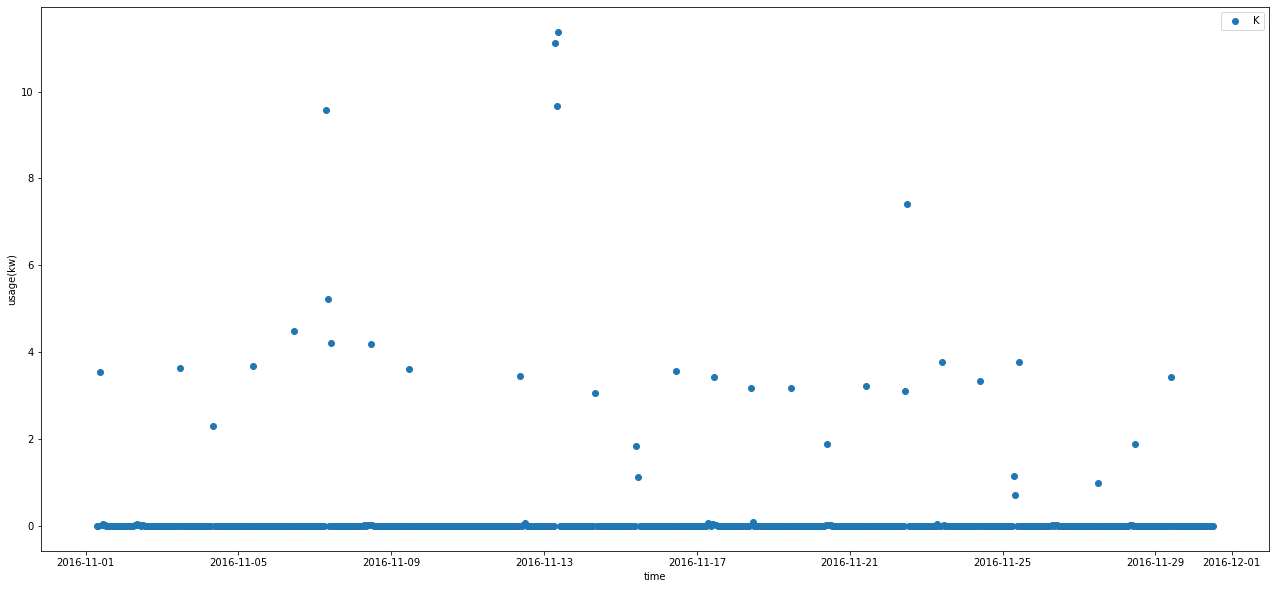

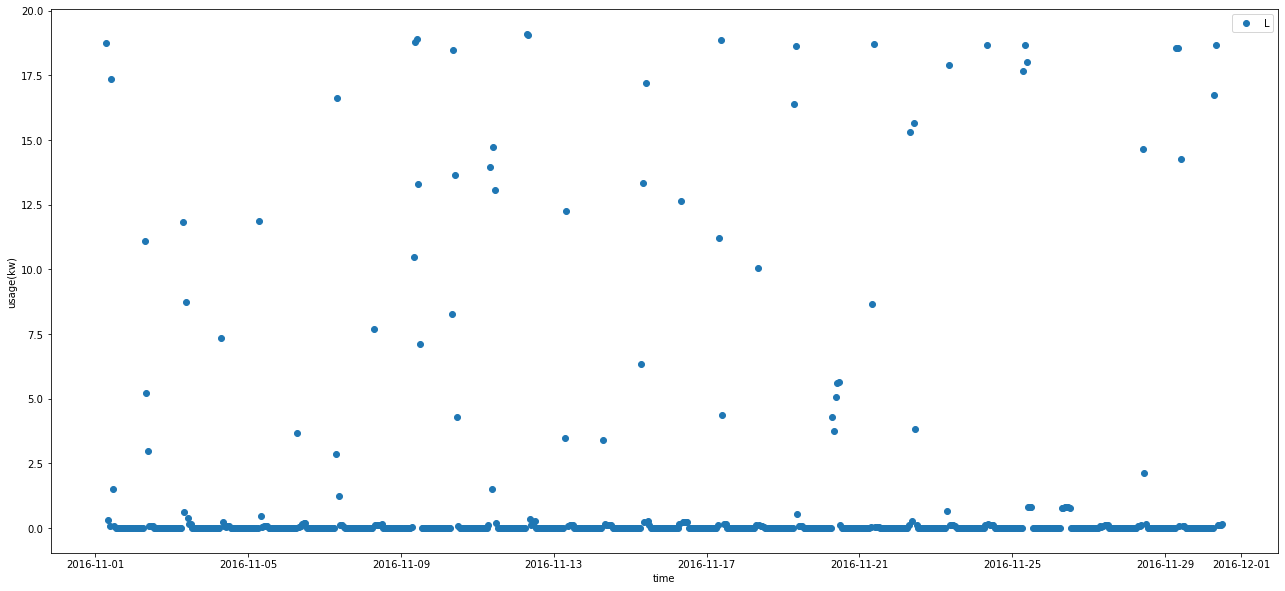

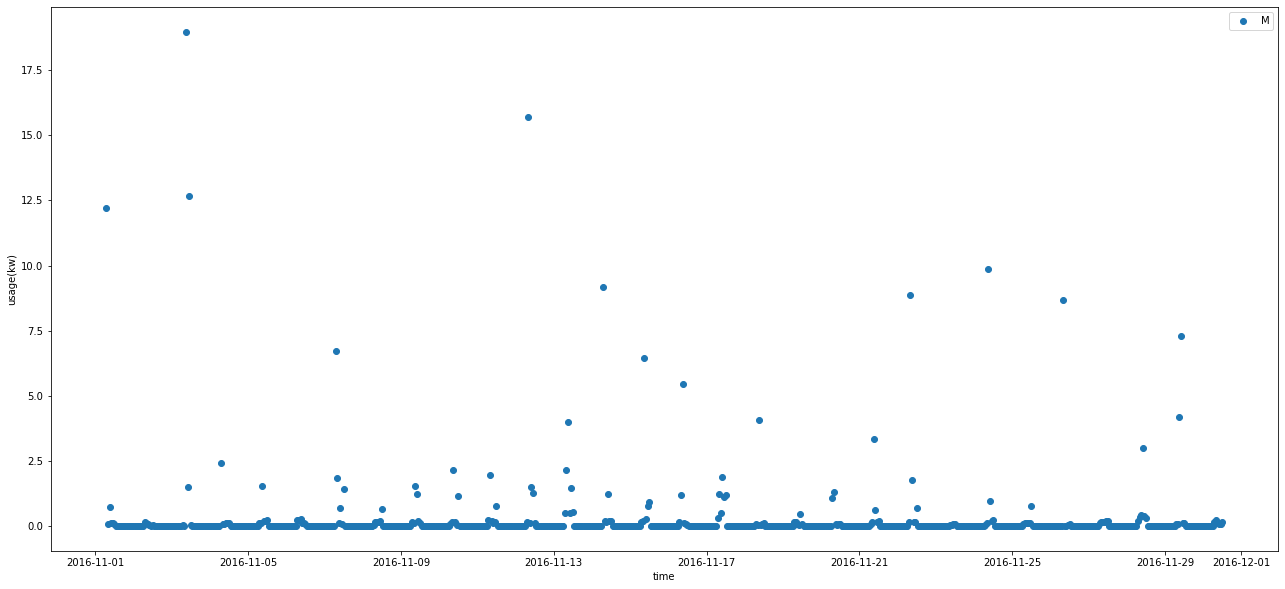

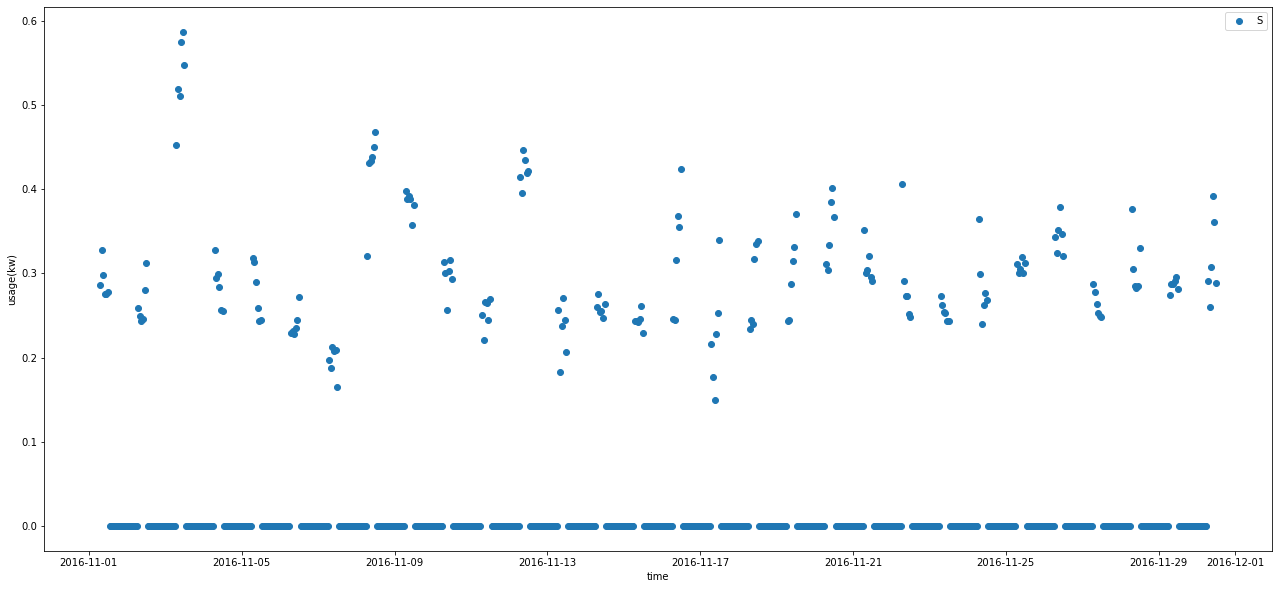

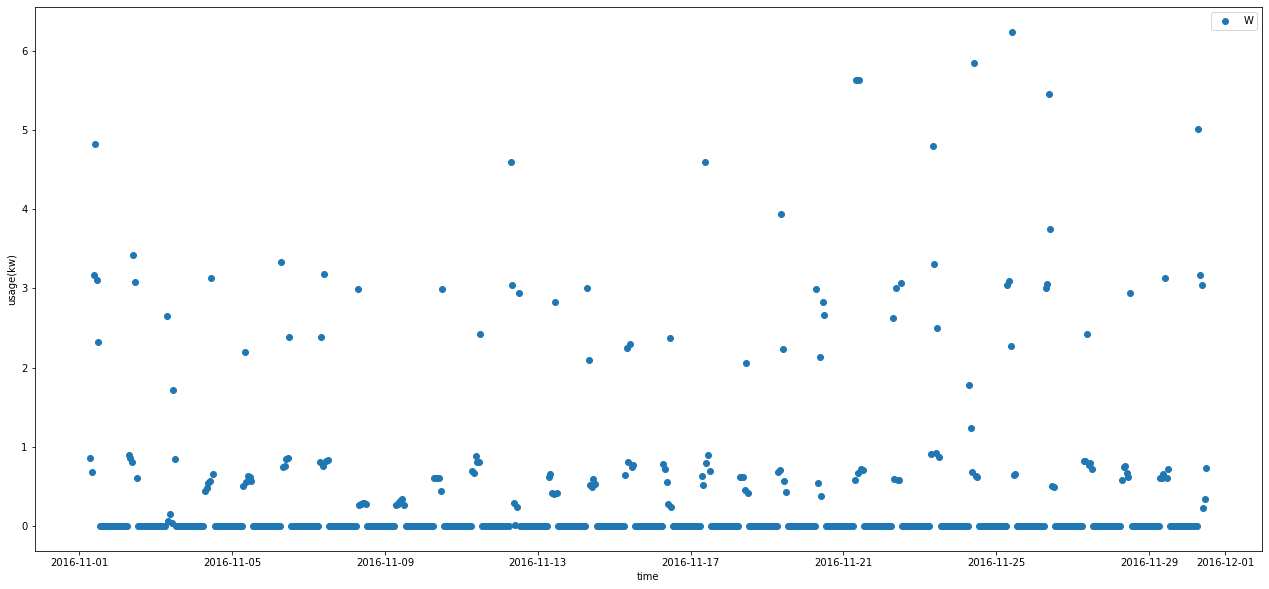

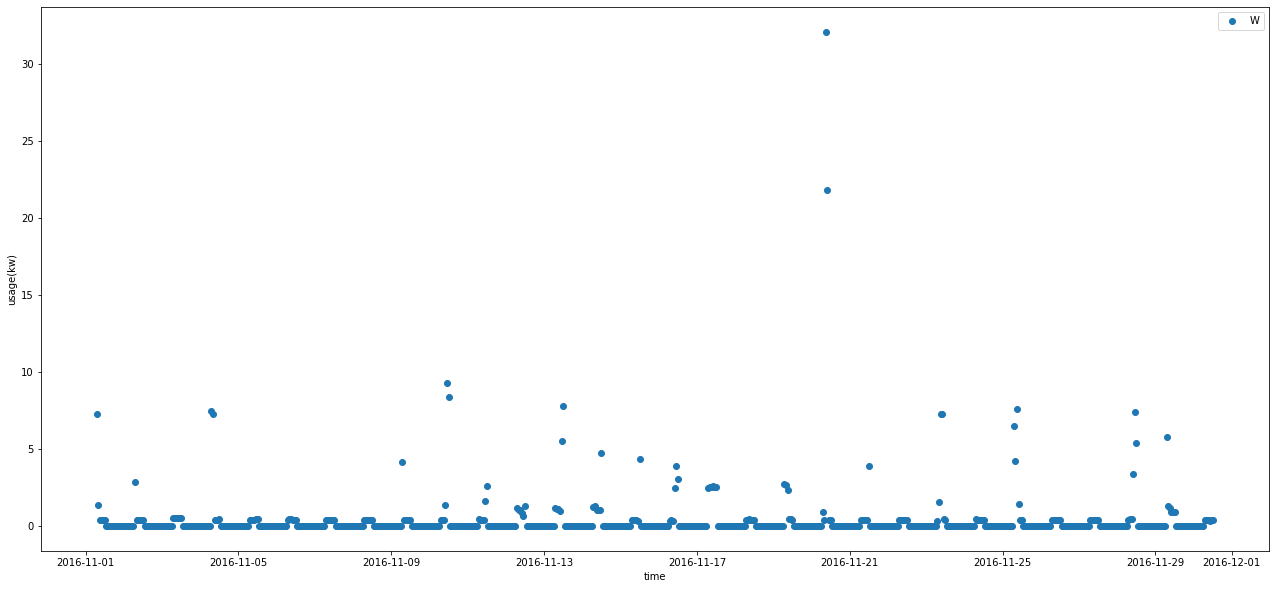

In [203]:
for col in cols:
    fig, ax = plt.subplots(figsize=(22, 10))
    ax.plot_date(df_hh.index, df_hh[col])
    plt.xlabel("time")
    plt.ylabel("usage(kw)")
    ax.legend(col)

In [204]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

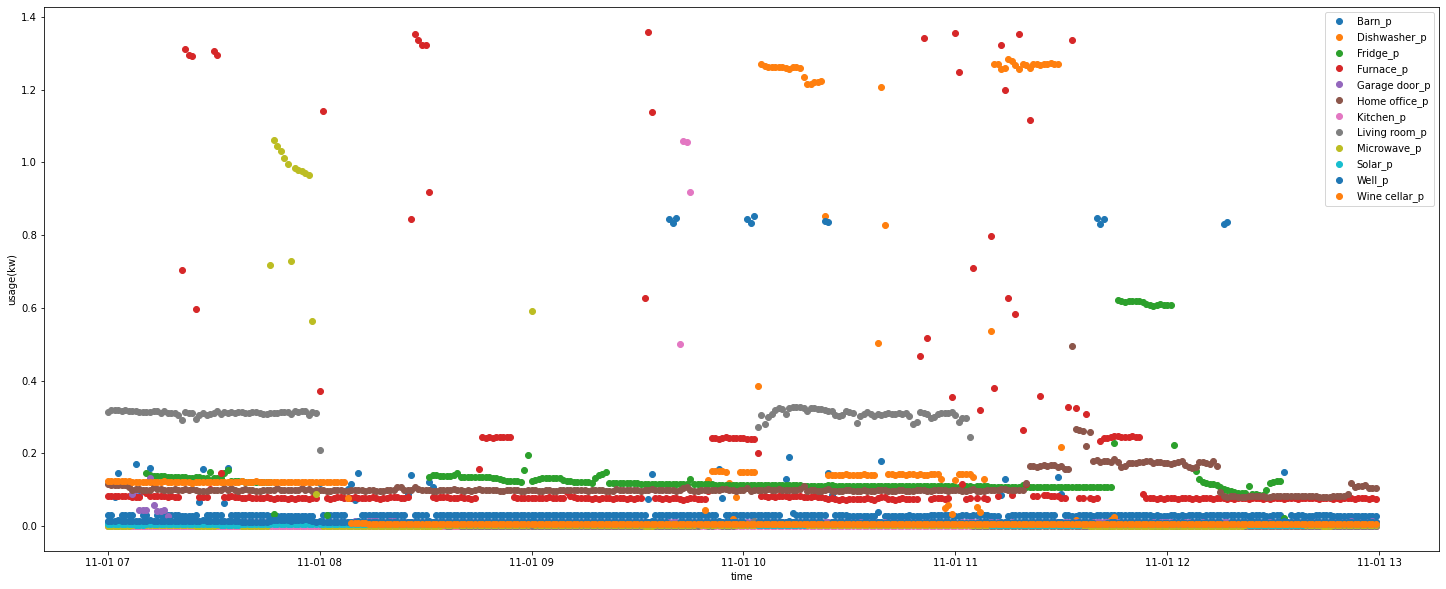

In [207]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot_date(d1.index, d1)
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))